# Importing Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy
from scipy.stats import chi2_contingency 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from statistics import stdev
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
sns.set_context("notebook")


# Loading the Dataset

In [2]:
# load the dataset
df = pd.read_csv('C:/Users/Sayan Mondal/Desktop/New folder (4)/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Exploratory Data Analysis (EDA)

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
cat_cols=df.select_dtypes(include=object).columns.tolist()
cat_df=pd.DataFrame(df[cat_cols].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(df.select_dtypes(include=object).describe())
display(cat_df)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


count
column         value                           
Attrition      Yes                          237
               No                          1233
BusinessTravel Non-Travel                   150
               Travel_Frequently            277
               Travel_Rarely               1043
Department     Human Resources               63
               Sales                        446
               Research & Development       961
EducationField Human Resources               27
               Other                         82
               Technical Degree             132
               Marketing                    159
               Medical                      464
               Life Sciences                606
Gender         Female                       588
               Male                         882
JobRole        Human Resources               52
               Research Director             80
               Sales Representative          83
               Manager                      102
               Healthcare Representative    131
               Manufacturing Director       145
               Laboratory Technician        259
               Research Scientist           292
               Sales Executive              326
MaritalStatus  Divorced                     327
               Single                       470
               Married                      673
Over18         Y                           1470
OverTime       Yes                          416
               No                          1054

In [8]:
num_cols=['Age','DailyRate','DistanceFromHome','EnvironmentSatisfaction','HourlyRate','JobInvolvement', 'JobLevel','JobSatisfaction','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear']
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear']

In [9]:

cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [10]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

In [11]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [12]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [1 0]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


In [13]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


In [14]:
df.duplicated().any()

False

# DATA VISUALIZATION

# Visualizing the Employee Attrition Rate.
¶

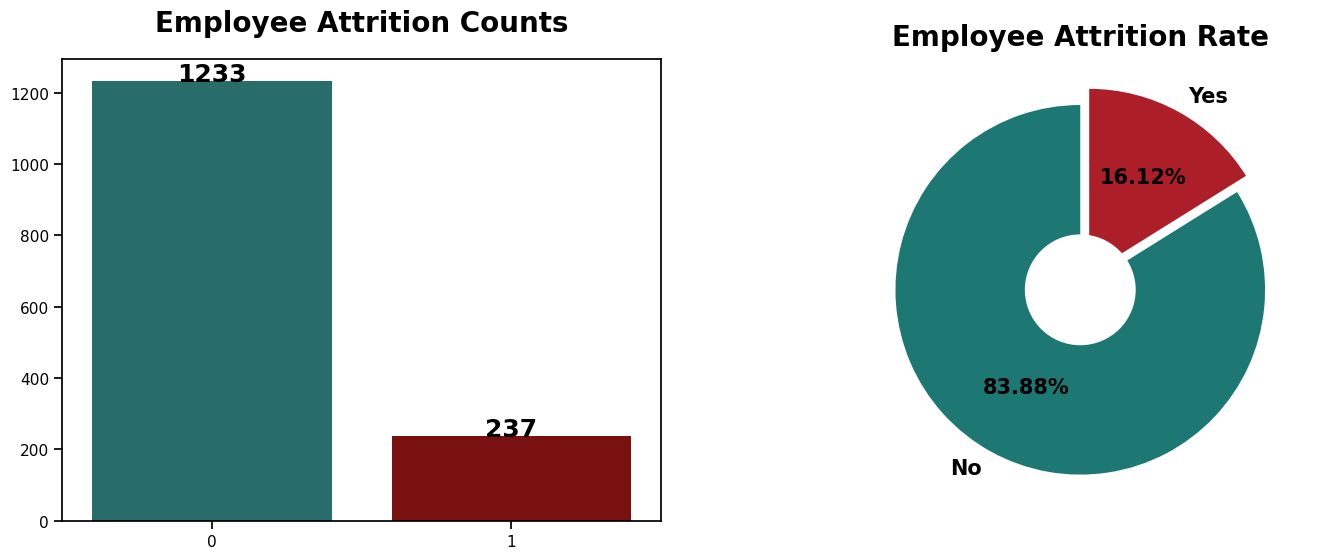

In [15]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = df["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette=["#1d7874","#8B0000"])
plt.title("Employee Attrition Counts",fontweight="black",size=20,pad=20)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontweight='black', fontsize=18)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"fontweight":"black","size":15},
        colors = ["#1d7874","#AC1F29"],explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=20,pad=10)
plt.show()

# Analyzing Employee Attrition by Age.

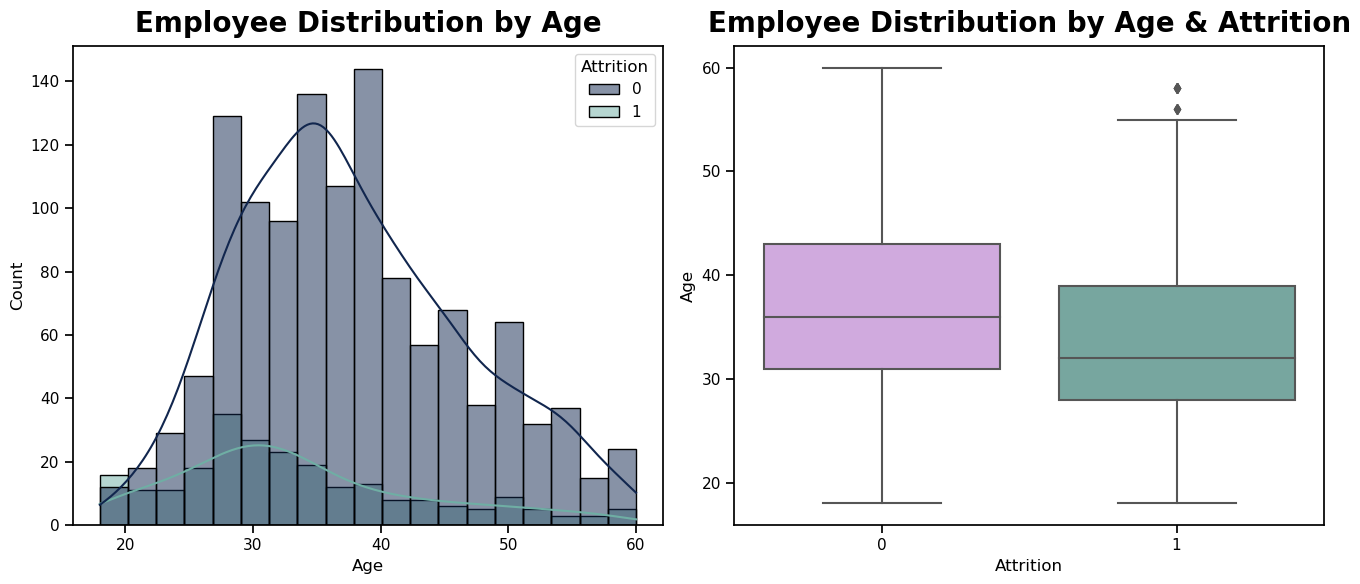

In [16]:
#Visualization to show Employee Distribution by Age.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="Age",hue="Attrition",data=df,kde=True,palette=["#11264e","#6faea4"])
plt.title("Employee Distribution by Age",fontweight="black",size=20,pad=10)


#Visualization to show Employee Distribution by Age & Attrition.
plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="Age",data=df,palette=["#D4A1E7","#6faea4"])
plt.title("Employee Distribution by Age & Attrition",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

ATTRIBUTION WITH RESPECT TO FEATURES OF DATASET

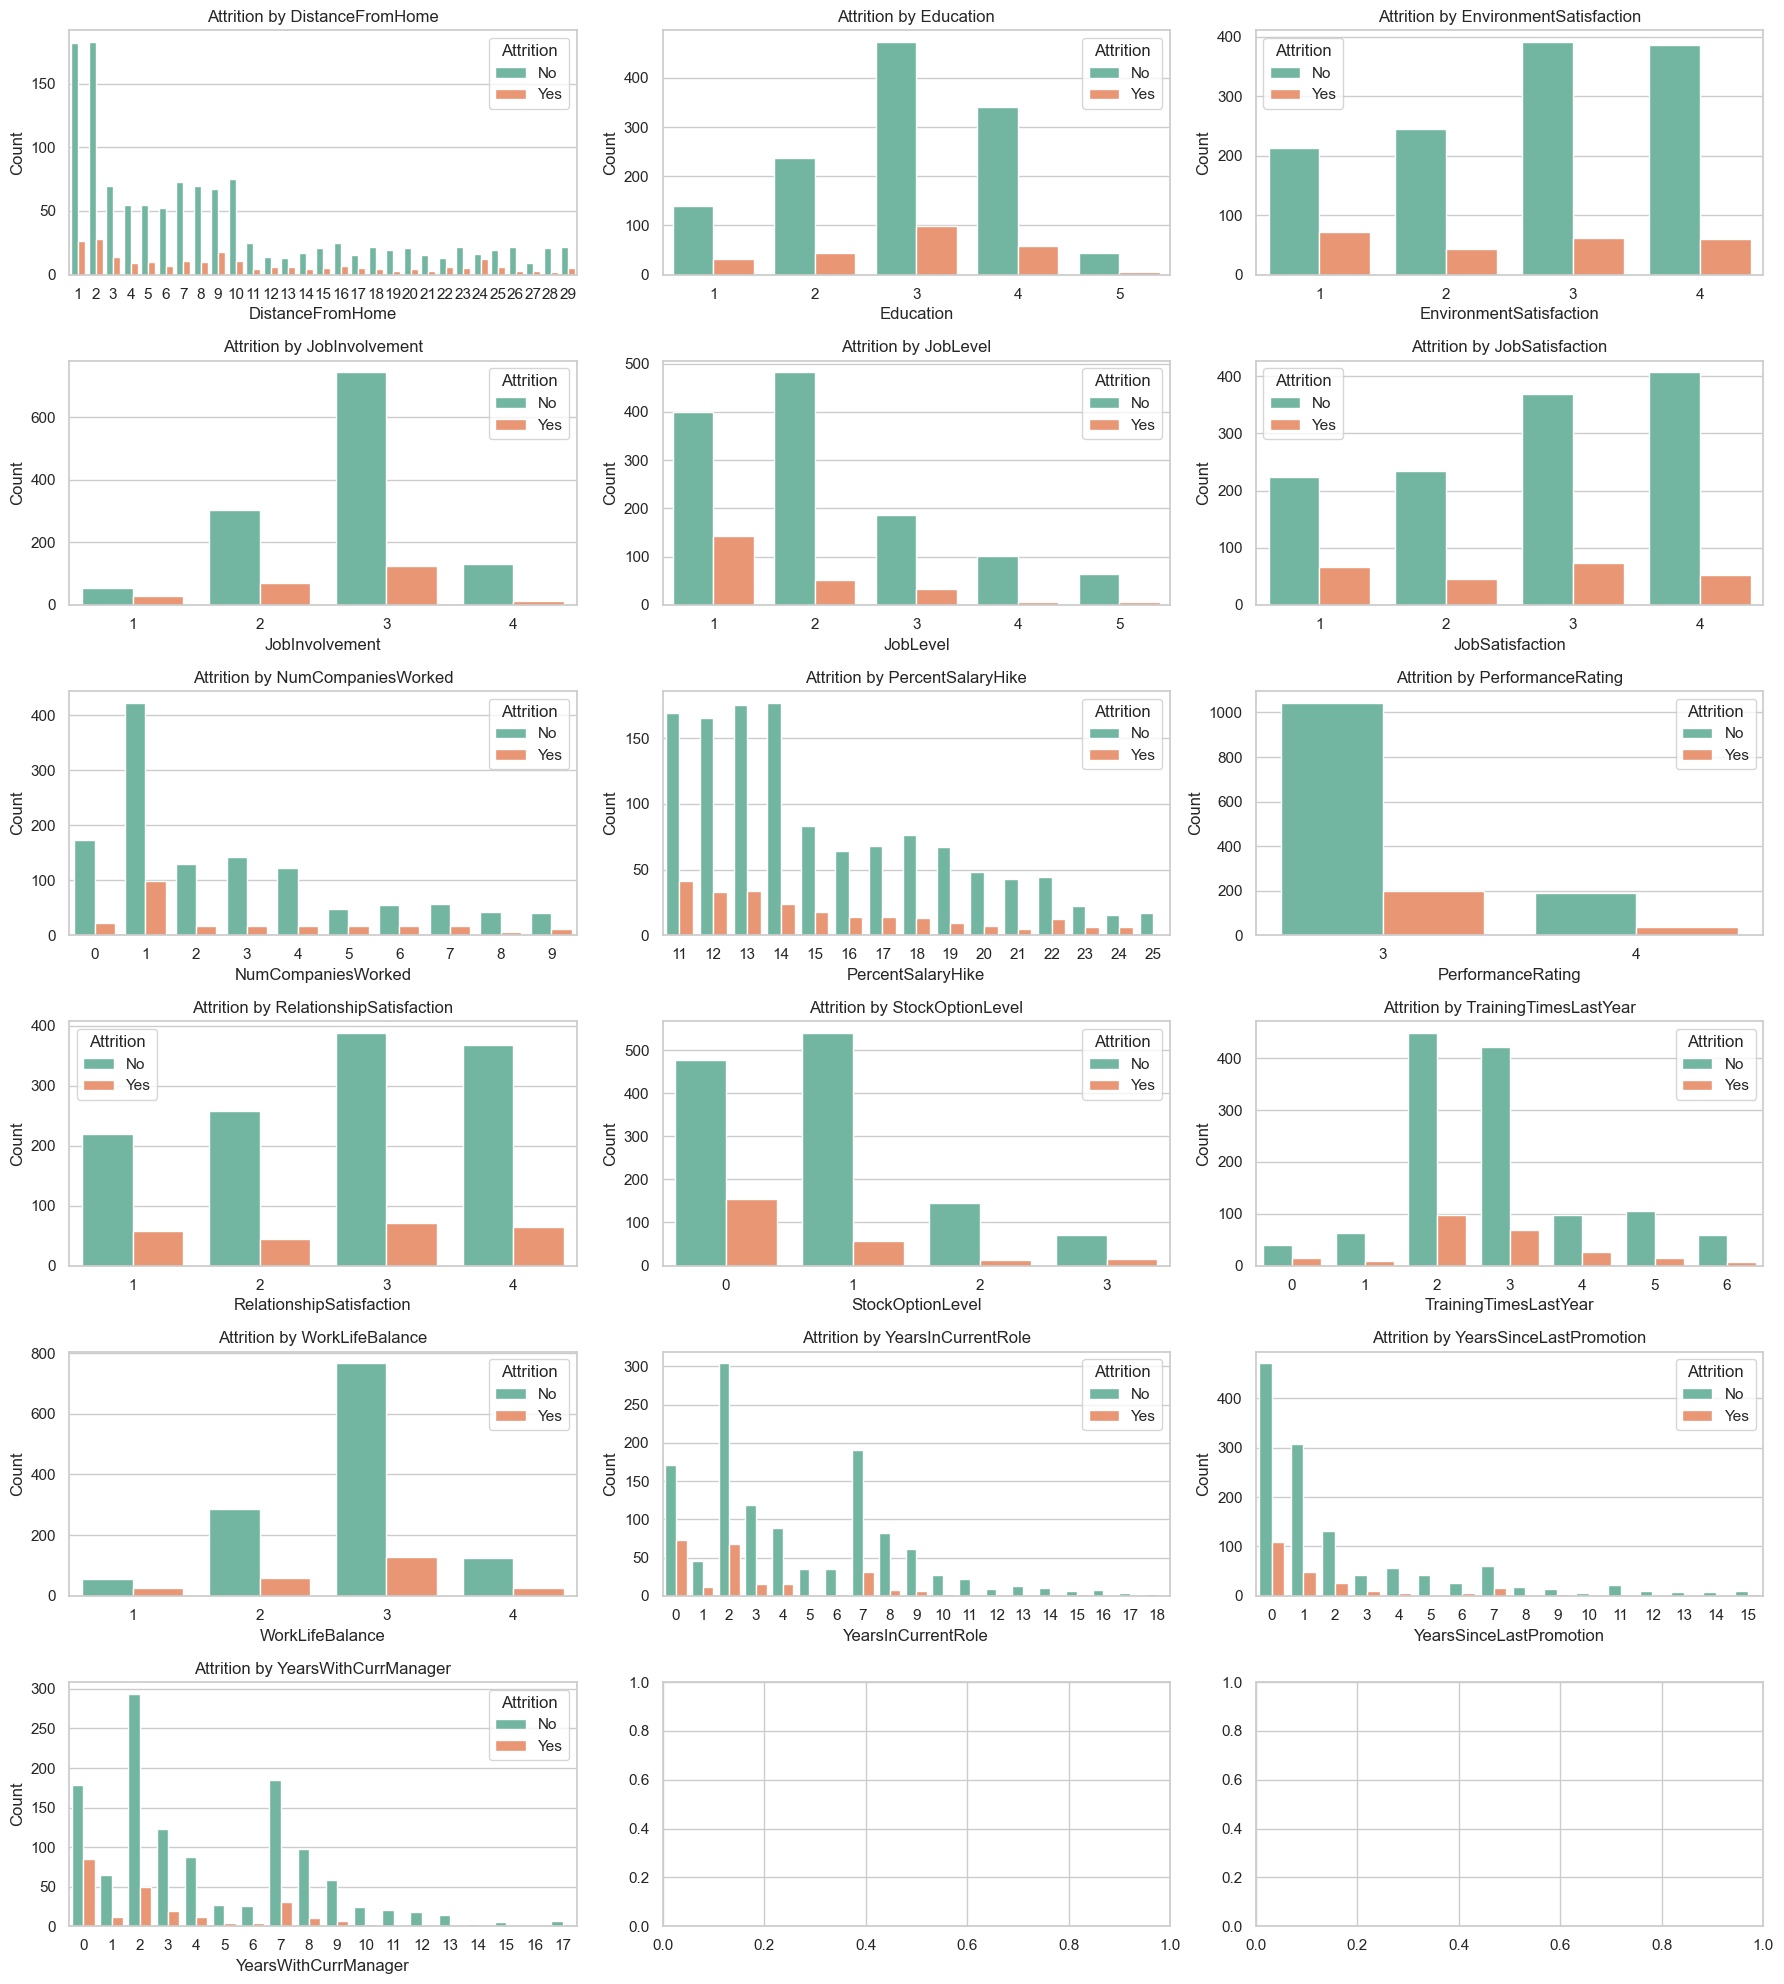

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# List of features to visualize
features_to_visualize = ['DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
                          'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
                          'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                          'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole',
                          'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Create subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 20))
fig.subplots_adjust(hspace=0.5)

# Loop through features and create visualizations
for feature, ax in zip(features_to_visualize, axes.flatten()):
    sns.countplot(x=feature, hue='Attrition', data=df, ax=ax, palette="Set2")
    ax.set_title(f'Attrition by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='Attrition', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


# K Means Clusterring Data

[[3.60348581e+03 3.42969432e+01 7.75873362e+00]
 [1.67440847e+04 4.68359788e+01 2.47830688e+01]
 [8.47639452e+03 3.83835616e+01 1.31232877e+01]]
3615635243.3362064
[0 0 0 ... 2 0 0]


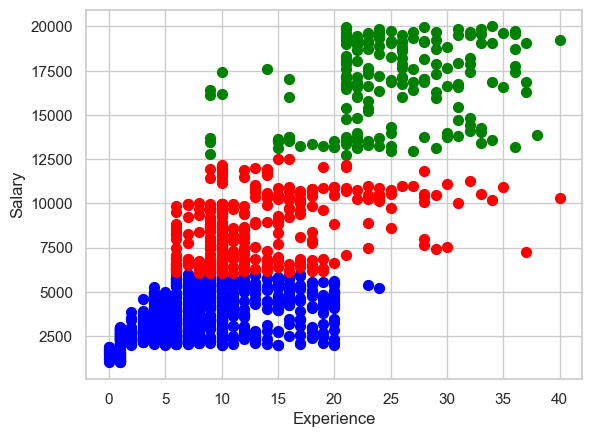

In [19]:
from sklearn.cluster import KMeans

# apply k-means clustering algorithm to group employees based on similar attributes
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df[['MonthlyIncome', 'Age', 'TotalWorkingYears']])

# analyze the clusters to identify segments with high attrition rates
print(kmeans.cluster_centers_) # print the centroids of each cluster
print(kmeans.inertia_) # print the sum of squared distances of each data point to its closest cluster center (also known as the objective function)
print(kmeans.labels_) # print the labels (cluster assignments) for each data point

# example: scatter plot of salary vs experience with different colors based on cluster assignments
plt.scatter(df.loc[kmeans.labels_ == 0, 'TotalWorkingYears'], df.loc[kmeans.labels_ == 0, 'MonthlyIncome'], s=50, color='blue')
plt.scatter(df.loc[kmeans.labels_ == 1, 'TotalWorkingYears'], df.loc[kmeans.labels_ == 1, 'MonthlyIncome'], s=50, color='green')
plt.scatter(df.loc[kmeans.labels_ == 2, 'TotalWorkingYears'], df.loc[kmeans.labels_ == 2, 'MonthlyIncome'], s=50, color='red')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

# Chi Squared Test

Chi2 Statistic for BusinessTravel: 24.1824, P-value: 0.0000
Chi2 Statistic for Department: 10.7960, P-value: 0.0045
Chi2 Statistic for EducationField: 16.0247, P-value: 0.0068
Chi2 Statistic for Gender: 1.1170, P-value: 0.2906
Chi2 Statistic for JobRole: 86.1903, P-value: 0.0000
Chi2 Statistic for MaritalStatus: 46.1637, P-value: 0.0000
Chi2 Statistic for OverTime: 87.5643, P-value: 0.0000


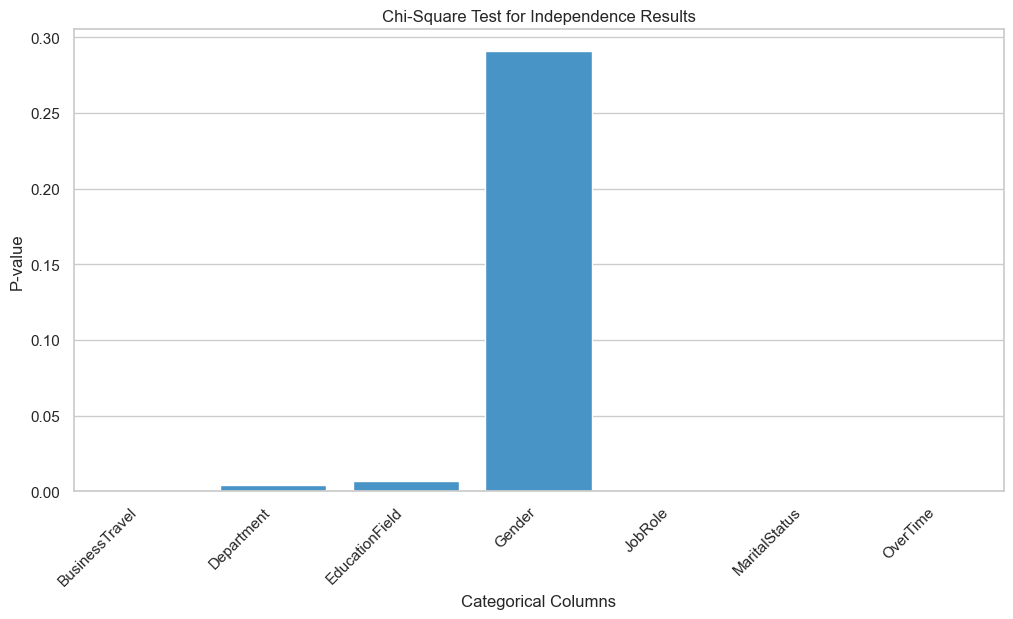

In [20]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Attrition' is the target variable in your dataset
cat_cols = df.select_dtypes(include="object").columns.tolist()

if "Attrition" in cat_cols:
    cat_cols.remove("Attrition")

chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

# Display chi-square statistics and p-values
for col, chi2_value in chi2_statistic.items():
    print(f"Chi2 Statistic for {col}: {chi2_value:.4f}, P-value: {p_values[col]:.4f}")

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x=list(chi2_statistic.keys()), y=list(p_values.values()), color='#3498db')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Categorical Columns')
plt.ylabel('P-value')
plt.title('Chi-Square Test for Independence Results')
plt.show()


# Feature Engineering

In [21]:
X=df.drop('Attrition',axis=1)
y=df.Attrition

In [22]:
X.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [23]:
# Display unique items in every column of X
for column in X.columns:
    unique_items = X[column].unique()
    print(f"Unique items in '{column}': {unique_items}")


Unique items in 'Age': [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Unique items in 'BusinessTravel': ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique items in 'DailyRate': [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Step 1: Label Encoding
label_encoder = LabelEncoder()
X['BusinessTravel'] = label_encoder.fit_transform(X['BusinessTravel'])
X['Gender'] = label_encoder.fit_transform(X['Gender'])
X['MaritalStatus'] = label_encoder.fit_transform(X['MaritalStatus'])
X['OverTime'] = label_encoder.fit_transform(X['OverTime'])

# Step 2: One-Hot Encoding
categorical_cols = ['Department', 'EducationField', 'JobRole']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Step 3: Standard Scaling (for numerical features)
numerical_cols = ['Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Print unique items in each column after encoding and scaling
for column in X.columns:
    unique_items = X[column].unique()
    print(f"Unique items in '{column}': {unique_items}")


Unique items in 'Age': [ 0.4463504   1.32236521  0.008343   -0.42966441 -1.08667552 -0.53916626
  2.41738373 -0.75816996  0.11784485 -0.10115885 -0.2106607  -0.86767181
 -0.64866811 -0.32016256 -0.97717366 -1.63418477  1.76037262 -1.41518107
 -1.74368662  0.55585225  0.77485596  0.99385966  0.2273467   0.66535411
  1.43186707 -1.19617737  1.21286336  1.97937632  0.88435781  2.08887817
 -1.52468292  1.54136892  0.33684855  1.86987447  2.30788188 -1.85318847
 -1.30567922 -1.96269033  2.19838002  1.65087077  1.10336151 -2.07219218
  2.52688558]
Unique items in 'BusinessTravel': [2 1 0]
Unique items in 'DailyRate': [ 7.42526534e-01 -1.29777460e+00  1.41436324e+00  1.46146618e+00
 -5.24294706e-01  5.02053617e-01  1.29288723e+00  1.37717670e+00
 -1.45395804e+00  1.23090967e+00  1.61495802e-02 -1.61014148e+00
 -3.28445630e-01  1.34742748e+00 -1.73409659e+00  1.45402887e+00
 -1.16142398e+00  7.94587681e-01  1.03258149e+00 -1.06969720e+00
 -3.21008323e-01  1.03010239e+00 -9.50700290e-01 -1.0201

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Coefficients:")
print(model.coef_)
print("\nModel Intercept:")
print(model.intercept_)
print("\nModel Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Print confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Coefficients:
[[-0.23693565 -0.0451374  -0.11109245  0.03804661  0.0968213  -0.32942023
   0.40720028  0.02619227 -0.40978065 -0.0469747  -0.35030535  0.68787291
  -0.16017189  0.08677288  0.21034201  2.05768509 -0.03806103  0.2429525
  -0.14716653 -0.2065059  -0.46229585 -0.11954187 -0.3026527   0.68452377
  -0.18309402  0.16624099 -0.12698377 -0.61160056  0.4670862  -0.28806216
  -0.01316734 -0.30298655 -0.25823594  0.61356816  0.640159    1.29983708
  -0.09333477 -0.00653791 -0.4700985   0.3038542  -0.17803724  0.76811879]]

Model Intercept:
[0.44999961]

Model Accuracy Score:
0.8877551020408163

Confusion Matrix:
[[246   9]
 [ 24  15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       255
           1       0.62      0.38      0.48        39

    accuracy                           0.89       294
   macro avg       0.77      0.67      0.71       294
weighted avg       0.87      0.89      0.88       

In [26]:
# Parameter tuning
grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)],
        'max_features': [None, 'sqrt'],
        'max_depth': [None, 5, 7, 14, 21],
        'min_samples_split': [2, 5, 8],
        'min_samples_leaf': [3, 4, 5],
        'bootstrap': [True, False]}

rf=RandomForestClassifier(random_state=92)
rf_cv=RandomizedSearchCV(estimator=rf, param_distributions=grid, scoring='roc_auc', 
                         n_iter=100, cv=5, random_state=92, n_jobs=-1)
rf_cv.fit(X_train, y_train)
print("Grid Search CV Best AUC = {:.3f}\nBest Params: {}".format(rf_cv.best_score_, rf_cv.best_estimator_))

Grid Search CV Best AUC = 0.820
Best Params: RandomForestClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=300, random_state=92)


In [27]:
train_auc=roc_auc_score(y_train, rf_cv.predict_proba(X_train)[:,1])
test_auc=roc_auc_score(y_test, rf_cv.predict_proba(X_test)[:,1])
train_acc=accuracy_score(y_train, rf_cv.predict(X_train))
test_acc=accuracy_score(y_test, rf_cv.predict(X_test))
print("Training Accuracy: {:.1f}% and AUC = {:.3f}".format(train_acc*100, train_auc))
print("Test set Accuracy: {:.1f}% and AUC = {:.3f}".format(test_acc*100, test_auc))

Training Accuracy: 89.9% and AUC = 0.979
Test set Accuracy: 87.8% and AUC = 0.720


In [28]:
col=sns.color_palette("mako", 20).as_hex()[::-1]
feat=pd.DataFrame({"Importance": rf_cv.best_estimator_.feature_importances_}, index=X_train.columns
                 ).sort_values(by="Importance")
plot_df=feat.nlargest(15, columns='Importance').sort_values(by="Importance", ascending=False)
fig = px.bar(plot_df, x=plot_df.index, y='Importance', text='Importance', 
             color=plot_df.index, opacity=0.7, color_discrete_sequence=col)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside',
                  marker_line=dict(width=1, color='#3F3B3A'), 
                  hovertemplate='%{x}<br>Importance = %{y:.2f}')
fig.update_layout(title_text='Top 15 Most Important Predictors of Employee Attrition', 
                  coloraxis_showscale=False, showlegend=False,font_color="#303030", height = 500,
                  paper_bgcolor='white', plot_bgcolor='white', yaxis_title="Importance", 
                  xaxis = dict(title="", showgrid=True, gridcolor="#f5f5f5"))
fig.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'classifier' is your trained classifier

def model(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    
    # Cross Validation Score
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Cross Validation Score: {:.2%}".format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    
    # ROC_AUC Score
    roc_auc = roc_auc_score(y_test, prediction)
    print("ROC_AUC Score: {:.2%}".format(roc_auc))
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, prediction)
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')
    
    # Classification Report
    print(classification_report(y_test, prediction))



Cross Validation Score: 82.92%
ROC_AUC Score: 60.75%


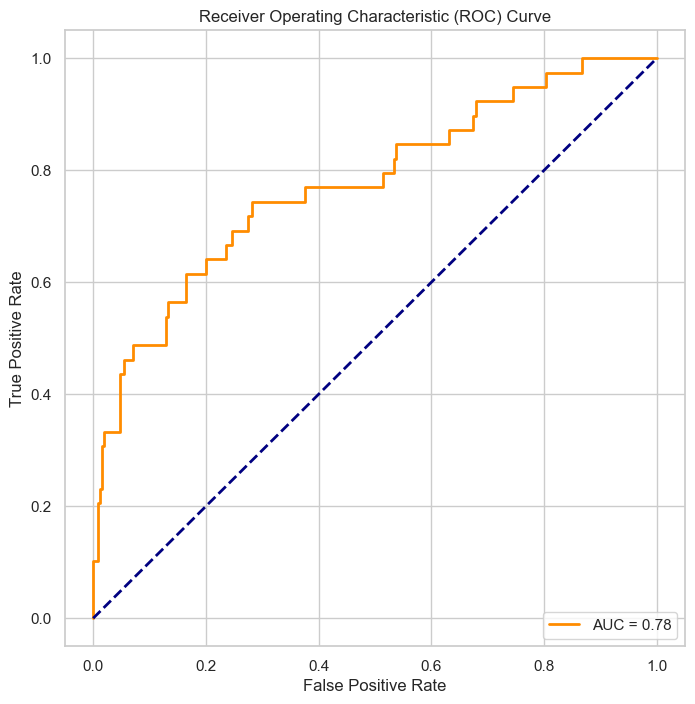

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       255
           1       0.69      0.23      0.35        39

    accuracy                           0.88       294
   macro avg       0.79      0.61      0.64       294
weighted avg       0.87      0.88      0.86       294



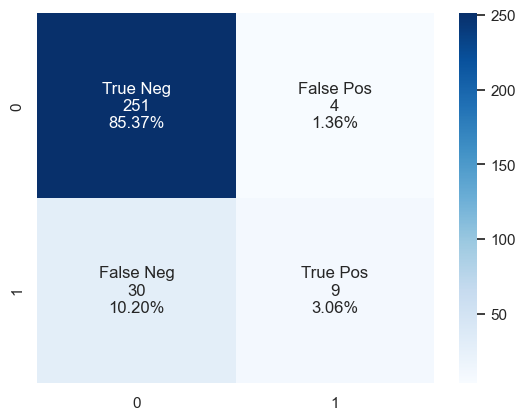

In [32]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
model(classifier_xgb,X_train.values,y_train.values,X_test.values,y_test.values)



Cross Validation Score: 74.96%
ROC_AUC Score: 52.67%


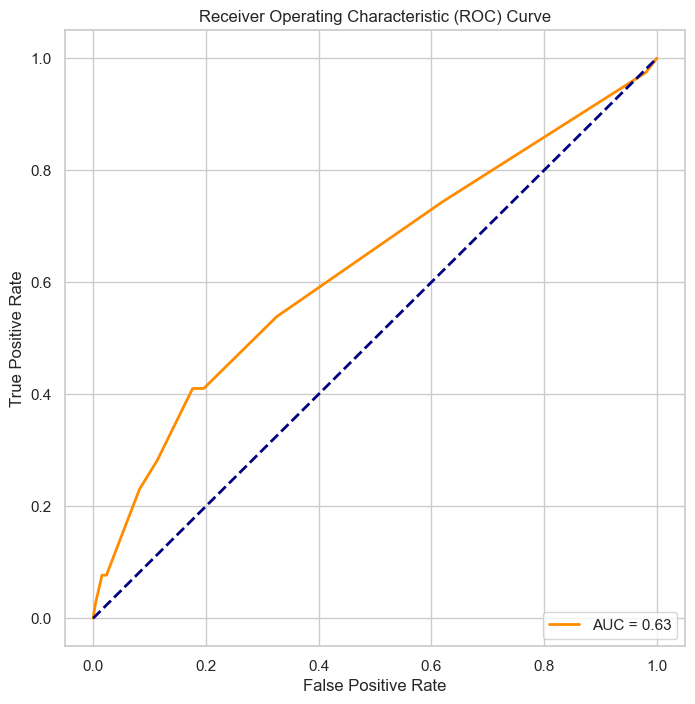

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       255
           1       0.33      0.08      0.12        39

    accuracy                           0.86       294
   macro avg       0.60      0.53      0.52       294
weighted avg       0.80      0.86      0.82       294



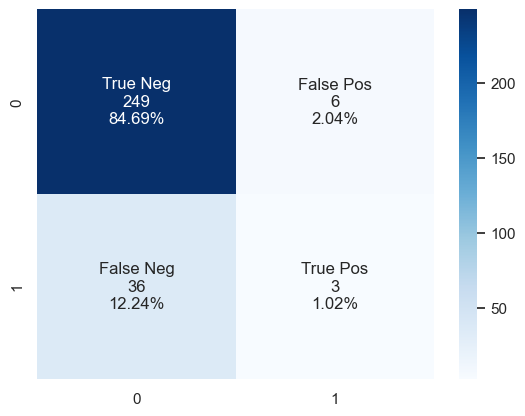

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
model(classifier_dt,X_train.values,y_train.values,X_test.values,y_test.values)

Cross Validation Score: 80.60%
ROC_AUC Score: 52.56%


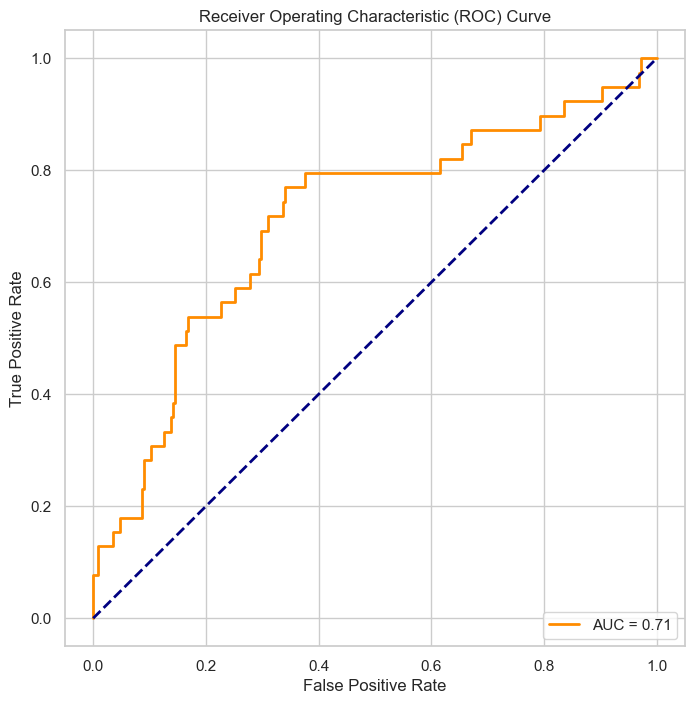

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       1.00      0.05      0.10        39

    accuracy                           0.87       294
   macro avg       0.94      0.53      0.51       294
weighted avg       0.89      0.87      0.82       294



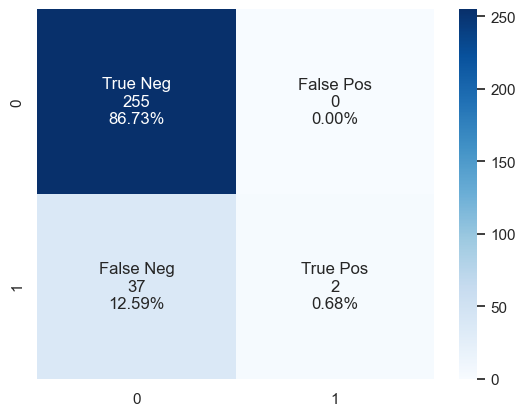

In [34]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
model(classifier_rf,X_train.values,y_train.values,X_test.values,y_test.values)

# Saving The Best Performing Classifier Model On The Basis Of ACCURACY

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Assuming X and y are your feature matrix and target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(model, 'logistic_regression_model.joblib')

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Coefficients:")
print(model.coef_)
print("\nModel Intercept:")
print(model.intercept_)
print("\nModel Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Print confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Coefficients:
[[-0.23693565 -0.0451374  -0.11109245  0.03804661  0.0968213  -0.32942023
   0.40720028  0.02619227 -0.40978065 -0.0469747  -0.35030535  0.68787291
  -0.16017189  0.08677288  0.21034201  2.05768509 -0.03806103  0.2429525
  -0.14716653 -0.2065059  -0.46229585 -0.11954187 -0.3026527   0.68452377
  -0.18309402  0.16624099 -0.12698377 -0.61160056  0.4670862  -0.28806216
  -0.01316734 -0.30298655 -0.25823594  0.61356816  0.640159    1.29983708
  -0.09333477 -0.00653791 -0.4700985   0.3038542  -0.17803724  0.76811879]]

Model Intercept:
[0.44999961]

Model Accuracy Score:
0.8877551020408163

Confusion Matrix:
[[246   9]
 [ 24  15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       255
           1       0.62      0.38      0.48        39

    accuracy                           0.89       294
   macro avg       0.77      0.67      0.71       294
weighted avg       0.87      0.89      0.88       

In [36]:
print("The Best Performing Model Is Linear Regression Classification with an accuaracy of ",accuracy_score(y_test, y_pred)*100, "%")

The Best Performing Model Is Linear Regression Classification with an accuaracy of  88.77551020408163 %


In [37]:
print("The Second Best Performing Model Is XGBClassifier Classification with an accuaracy of 82.92%")

The Second Best Performing Model Is XGBClassifier Classification with an accuaracy of 82.92%


In [38]:
print("The Third Best Performing Model Is RandomForestClassifier Classification with an accuaracy of 80.60%")

The Third Best Performing Model Is RandomForestClassifier Classification with an accuaracy of 80.60%
